In [ ]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
%%time

!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

Cloning into 'yolov5'...
remote: Enumerating objects: 5979, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 5979 (delta 13), reused 23 (delta 7), pack-reused 5946
Receiving objects: 100% (5979/5979), 8.36 MiB | 20.73 MiB/s, done.
Resolving deltas: 100% (4082/4082), done.
Requirement already up-to-date: pycocotools in /usr/local/lib/python3.7/dist-packages (2.0.2)
     |████████████████████████████████| 645kB 12.4MB/s 
CPU times: user 75.6 ms, sys: 26.7 ms, total: 102 ms
Wall time: 8.29 s


In [ ]:
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('./train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764800,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020261,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [ ]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'./training_images/{image}.jpg')
img.shape

Image ID: vid_4_6520


(380, 676, 3)

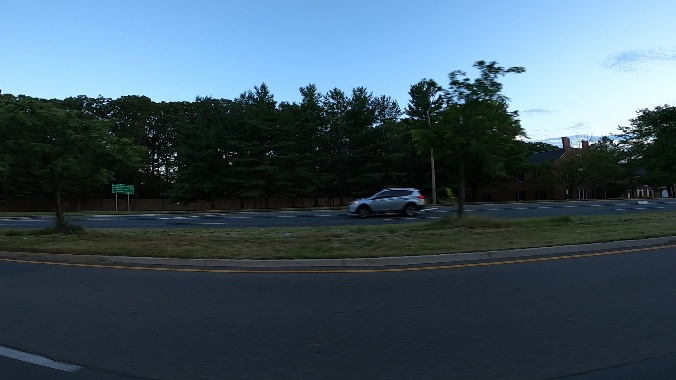

In [ ]:
image = random.choice(index)
Image(filename=f'./training_images/{image}.jpg',width=600)

In [ ]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/tmp/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/tmp/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/tmp/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/tmp/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/tmp/convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("./{}/{}.jpg".format(source,name),'/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

In [ ]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source ./testing_images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=676, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='./testing_images', update=False, view_img=False, weights=['yolov5/yolov5s.pt'])
YOLOv5 🚀 v5.0-41-g4890499 torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/175 /content/testing_images/vid_5_25100.jpg: 416x704 Done. (0.483s)
image 2/175 /content/testing_images/vid_5_25120.jpg: 416x704 Done. (0.392s)
image 3/175 /content/testing_images/vid_5_25140.jpg: 416x704 Done. (0.395s)
image 4/175 /content/testing_images/vid_5_25160.jpg: 416x704 Done. (0.381s)
image 5/175 /content/testing_images/vid_5_25180.jpg: 416x704 Done. (0.380s)
image 6/175 /content/testing_images/vid_5_25200.jpg: 416x704 Done. (0.388s)
image 7/175 /content/testing_ima

In [ ]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("./runs/detect/exp2"):
    predicted_files.extend(filenames)

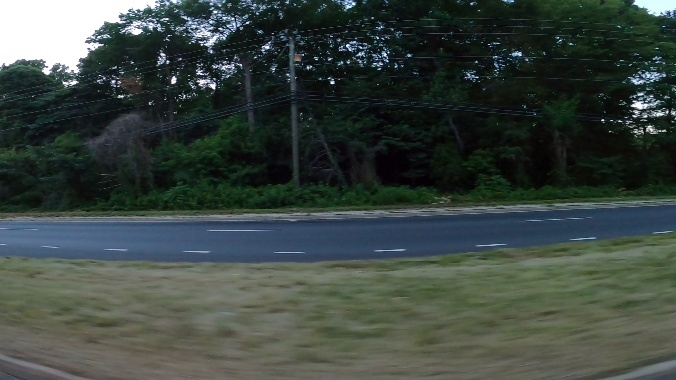

In [ ]:
Image(filename=f'./runs/detect/exp2/{random.choice(predicted_files)}')

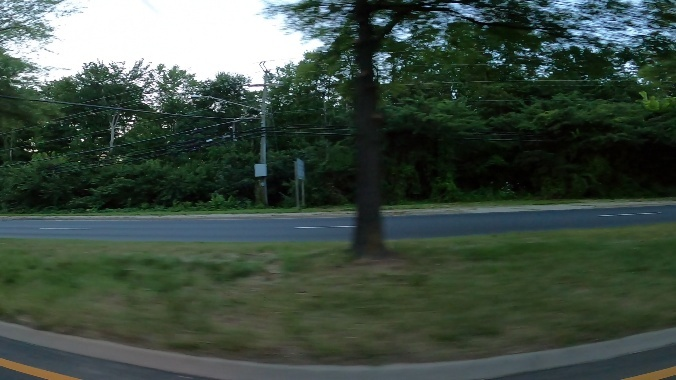

In [ ]:
Image(filename=f'runs/detect/exp2/{random.choice(predicted_files)}')

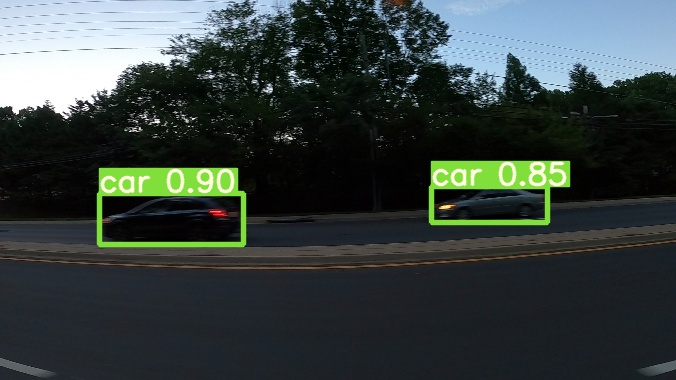

In [ ]:
Image(filename=f'runs/detect/exp2/{random.choice(predicted_files)}')

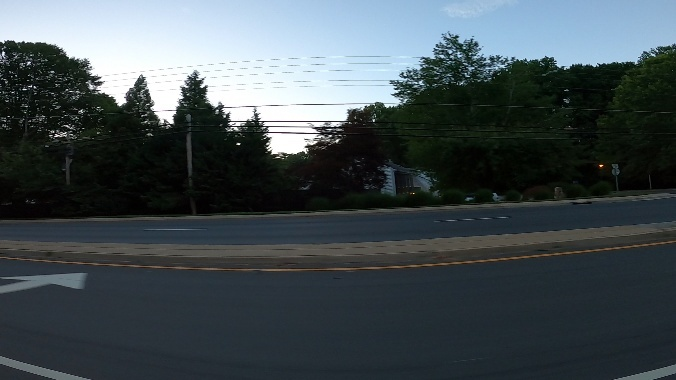

In [ ]:
Image(filename=f'runs/detect/exp2/{random.choice(predicted_files)}')

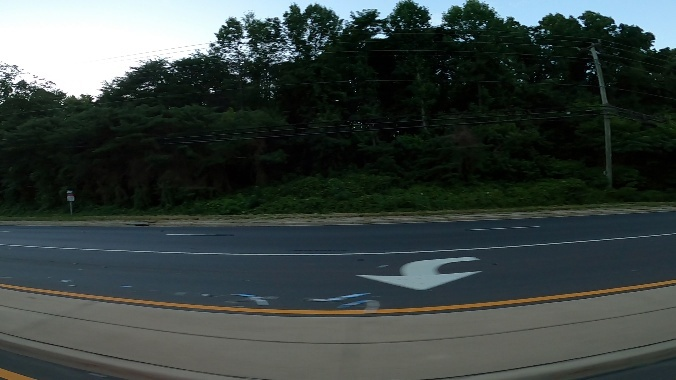

In [ ]:
Image(filename=f'runs/detect/exp2/{random.choice(predicted_files)}')

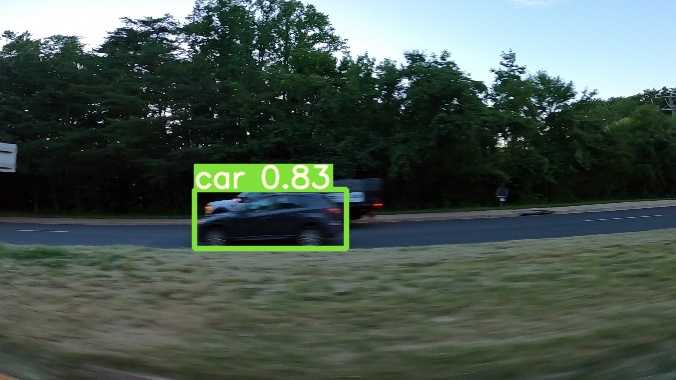

In [ ]:
Image(filename=f'runs/detect/exp2/{predicted_files[10]}')

In [ ]:
img_array = []
import glob
for filename in glob.glob('runs/detect/exp2/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 7, size)

In [ ]:
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()